In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing the dataset

df = pd.read_csv("HR Data.csv")

Print first 5 datas

In [3]:
df.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,10-08-2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,02-03-2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,20-03-2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,12-10-2023,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,09-12-2024,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


Getting basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1048575 non-null  int64 
 1   Employee_ID         1048575 non-null  object
 2   Full_Name           1048575 non-null  object
 3   Department          1048575 non-null  object
 4   Job_Title           1048575 non-null  object
 5   Hire_Date           1048575 non-null  object
 6   Location            1048575 non-null  object
 7   Performance_Rating  1048575 non-null  int64 
 8   Experience_Years    1048575 non-null  int64 
 9   Status              1048575 non-null  object
 10  Work_Mode           1048575 non-null  object
 11  Salary_INR          1048575 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 96.0+ MB


Removing unwamnted column from the dataframe

In [5]:
df.drop( 'Unnamed: 0', axis = 1, inplace = True)

In [6]:
#unnamed: 0 is an index column so we drop it

Change the data-tpye of Date colum

In [7]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], format='%d-%m-%Y', dayfirst=True)

In [8]:
df.head(3)

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Employee_ID         1048575 non-null  object        
 1   Full_Name           1048575 non-null  object        
 2   Department          1048575 non-null  object        
 3   Job_Title           1048575 non-null  object        
 4   Hire_Date           1048575 non-null  datetime64[ns]
 5   Location            1048575 non-null  object        
 6   Performance_Rating  1048575 non-null  int64         
 7   Experience_Years    1048575 non-null  int64         
 8   Status              1048575 non-null  object        
 9   Work_Mode           1048575 non-null  object        
 10  Salary_INR          1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 88.0+ MB


1> What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?

In [10]:

status = df['Status'].value_counts()
status

Status
Active        734439
Resigned      209342
Retired        52462
Terminated     52332
Name: count, dtype: int64

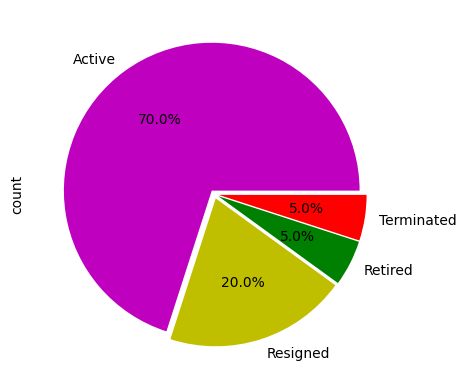

In [11]:
status.plot( kind = 'pie' , colors = 'mygr', autopct= '%1.1f%%', explode=(0.03,0.03,0.03,0.03))

plt.show()

What is the distribution of work modes (On-site, Remote) ?

In [12]:
work = df['Work_Mode'].value_counts()
work

Work_Mode
On-site    628436
Remote     420139
Name: count, dtype: int64

How many employees are there in each department?

In [13]:
df['Department'].value_counts()

Department
IT            315028
Sales         209524
Operations    157513
Marketing     126113
Finance       104722
HR             83484
R&D            52191
Name: count, dtype: int64

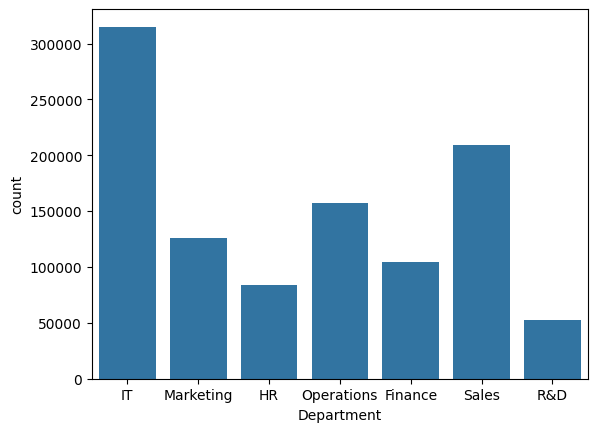

In [14]:
sns.countplot(x='Department', data=df)

plt.show()

What is the average salary by Department?

In [15]:
dept = df.groupby('Department')['Salary_INR'].mean()/1000

dept
dept.sort_values(ascending=False)


Department
IT            1130.479832
Finance        940.482537
R&D            800.564067
Sales          792.601138
Marketing      769.819762
Operations     754.691129
HR             742.924587
Name: Salary_INR, dtype: float64

Which job title has the highest average salary?

In [16]:
salary = df.groupby('Job_Title')['Salary_INR'].mean()/1000
salary
salary.sort_values(ascending=False)

Job_Title
IT Manager                       2100.885083
Finance Manager                  1741.848183
HR Manager                       1252.528584
Business Development Manager     1251.137289
Software Engineer                1198.176578
Financial Analyst                1052.371082
Brand Manager                     802.426092
Research Scientist                802.347394
Content Strategist                801.839612
CTO                               801.582074
HR Director                       801.014861
DevOps Engineer                   800.479451
Lab Technician                    800.413724
Operations Executive              800.382282
Data Analyst                      800.130396
Account Manager                   800.025052
Talent Acquisition Specialist     799.996528
Operations Director               799.843256
Supply Chain Manager              798.936556
Marketing Executive               798.772273
Product Developer                 798.343925
Sales Director                    798.296456


How many employees Resigned & Terminated in each department ?

In [17]:
df_Resigned =  df[df['Status'] == 'Resigned']

df_Resigned


,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
8,EMP0000009,Cathy Thompson,Finance,Financial Analyst,2018-05-29,"South Catherine, Belize",4,7,Resigned,Remote,1138452
11,EMP0000012,Kevin Lowe,Sales,Account Manager,2024-07-02,"East Kent, Qatar",3,1,Resigned,On-site,1111759
16,EMP0000017,Robert Martin,Operations,Logistics Coordinator,2025-05-13,"Laurahaven, Afghanistan",3,0,Resigned,On-site,859025
19,EMP0000020,Donald Hoffman,Marketing,Content Strategist,2022-04-01,"South James, New Zealand",3,3,Resigned,On-site,965154
...,...,...,...,...,...,...,...,...,...,...,...
1048552,EMP1048553,Diana Maxwell,Finance,Accountant,2025-01-22,"Kristenchester, Saint Kitts and Nevis",1,0,Resigned,Remote,402050
1048553,EMP1048554,Karen Cox,Sales,Account Manager,2024-08-29,"Frostbury, Taiwan",2,0,Resigned,Remote,728511
1048560,EMP1048561,Ashley Yoder,Operations,Supply Chain Manager,2024-12-07,"Port Briannamouth, Azerbaijan",1,0,Resigned,On-site,430300
1048561,EMP1048562,Veronica Carrillo,IT,Software Engineer,2017-09-02,"South Jillhaven, Egypt",5,7,Resigned,On-site,1405306


In [18]:
R_emp = df_Resigned.groupby('Department')['Status'].count()

R_emp

Department
Finance       21082
HR            16691
IT            63063
Marketing     24993
Operations    31223
R&D           10519
Sales         41771
Name: Status, dtype: int64